# Problem 2

https://towardsdatascience.com/bayesian-optimization-a-step-by-step-approach-a1cb678dd2ec

## Question 1
### (a) Assume that a Gaussian Process has been fit to your data, and you’ve got the following mean and standard deviation for your posterior distribution at each price point:

The current highest observed profit is 2500 USD. Calculate the EI for the prices x = 55 and x = 65. Remember that the expected improvement is:

where In (x) = max(fmax − μn (x), 0) and Φ is CDF and φ is PDF of standard normal distribu- tion, and u = (fmax − μn(x) − δ)/σn(x). Here δ is a parameter to guide the policy in balancing exploration/exploitation. Assume δ = 0.

In [1]:
import pandas as pd

data = {
    'Price (USD)': [50, 60, 70],
    'Profit (USD)': [2200, 2500, 2100]
}

data_1 = {
    'Price (USD)': [55, 65],
    'Mean Profit (USD)': [2300, 2400],
    'Standard Deviation': [100, 150]
}

df = pd.DataFrame(data)
df_1 = pd.DataFrame(data_1)
print(df)
print(df_1)

   Price (USD)  Profit (USD)
0           50          2200
1           60          2500
2           70          2100
   Price (USD)  Mean Profit (USD)  Standard Deviation
0           55               2300                 100
1           65               2400                 150


We need to calculate the IE for the two posterior point that have been found. Technically, those points are sample in their neighborhood and now the job is to calculate their EI in order to find the points that maximize the

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue July 26 15:54:41 2023

@author: Maryam Daryalal, MATH60623A
"""

epsilon = 1e-8

# Import the libraries
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

Y_sample = [55, 65]
mu = [2300, 2400]
std = [100, 150]

# Compute Expected Improvement
y_best = 2500
xi = 0.01
Z = (2300 - y_best - xi) / (100 + epsilon)
EI_55 = (2300 - y_best - xi) * norm.cdf(Z) + 100 * norm.pdf(Z)
print("The EI for the sample point X=55 is {}".format(EI_55))
# Compute Expected Improvement
y_best = 2500
xi = 0.01
Z = (2400 - y_best - xi) / (150 + epsilon)
EI_65 = (2400 - y_best - xi) * norm.cdf(Z) + 150 * norm.pdf(Z)
print("The EI for the sample point X=65 is {}".format(EI_65))

The EI for the sample point X=55 is 0.8488427873571665
The EI for the sample point X=65 is 22.665422254766167


### (b) Based on the EI, which price should you test next?

Base on the EI, we should take the sample point X=65 as the EI is higher. We are interested in a higher value of EI, because it gives the maximum improvement of the target function (‘y’ value) from the current maximum one. We could also say that a higher value indicates that the new data point is returning a high value from the function which is “significantly” higher than the maximum obtained so far.

## Question 2
Now simulate the daily sales reaction to the price change as a black-box function. Start with the following observed price points and their corresponding profits: This data should serve as the starting point for your Bayesian Optimization algorithm. Implement a Bayesian Optimization algorithm in Python by following the below steps.


(a) Implement a black-box function simulate-sales(price: float, seed: int = None) -> float that takes a price as input and returns the profit. You choose this function yourself. It should incor- porate randomness to mimic the uncertainty of customer behavior. You can use the optional seed parameter to control the randomness for testing purposes.


In [9]:


# Fonction that represent the data
# y = -0,0758x2 + 5,1212x + 2309,7

import random

def simulate_sales(price: float, seed: int = None) -> float:
    # Set a seed for reproducibility (optional)
    if seed is not None:
        np.random.seed(seed)

    # Define a quadratic equation to calculate profit
    a = -0.08
    b = -5
    c = 2309
    epsilon = np.random.normal(0, 300)  # Adding random noise (epsilon) with mean 0 and standard deviation 10
    profit = a * price + b * price + 2400 + epsilon
    return profit

data = {
    'Day': list(range(1, 11)),
    'Price (USD)': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
}

df = pd.DataFrame(data)

# Apply the calculate_profit function to the DataFrame to calculate Profit (USD)
df['Profit (USD)'] = df['Price (USD)'].apply(simulate_sales)

print(df)


   Day  Price (USD)  Profit (USD)
0    1           50   1840.333292
1    2           60   1927.121933
2    3           70   2112.277948
3    4           80   2042.159013
4    5           90   1674.658795
5    6          100   2155.019654
6    7          110   1555.364917
7    8          120   1865.266605
8    9          130   2115.502161
9   10          140   1656.631358


(b) Use the provided initial data as your starting history of prices and corresponding profits.


In [10]:
import pandas as pd

data = {
    'Price (USD)': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'Profit (USD)': [2200, 2500, 2400, 2300, 2100, 2000, 1900, 1800, 1700, 1600]
}

prior = pd.DataFrame(data)
prior


Price (USD)  Profit (USD)
0           50          2200
1           60          2500
2           70          2400
3           80          2300
4           90          2100
5          100          2000
6          110          1900
7          120          1800
8          130          1700
9          140          1600

(c) Using the scikit-learn library or a similar library for the Gaussian Process Regression, implement a Gaussian Process Regression model that takes the history of prices and corresponding profits as input, and outputs a posterior distribution of the profit function.


(d) Implement the Expected Improvement (EI) acquisition function. This function should take the posterior distribution of the profit function as input and return the price that is expected to yield the maximum improvement.


In [11]:
def calculate_expected_improvement(mu, std, y_best, xi=0):
    # Calculate u,and EI
    Z = (mu - y_best - xi) / (std + epsilon)
    EI = (mu - y_best - xi) * norm.cdf(Z) + std * norm.pdf(Z)
    (EI)
    return EI


(e) Implement the Bayesian Optimization algorithm that:
1. Selects the next price using the EI acquisition function.
2. Observes the profit for the selected price using the simulate-sales function and appends this to the history.
3. Updates the Gaussian Process Regression model with the new observation.


(f) Run the Bayesian Optimization algorithm for 50 iterations, starting with the initial data provided.


In [12]:
# Kernel of the trained sklearn Gaussian process regressor:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
gpr = GaussianProcessRegressor()

#print(gpr.kernel_)

/Users/philippebeliveau/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/philippebeliveau/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/philippebeliveau/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn

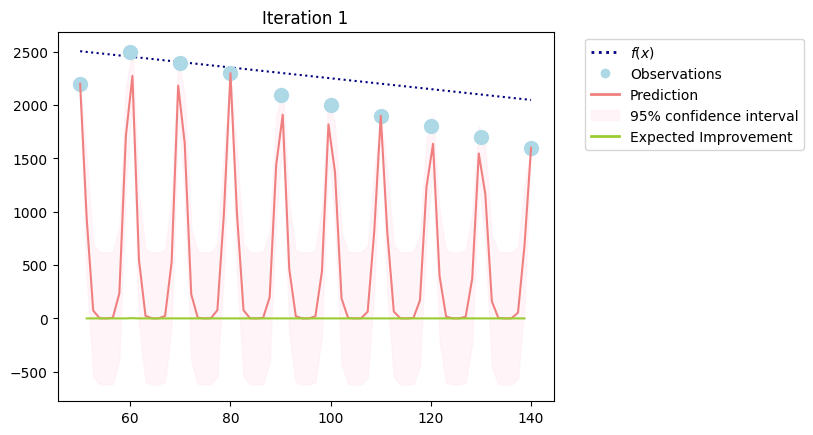

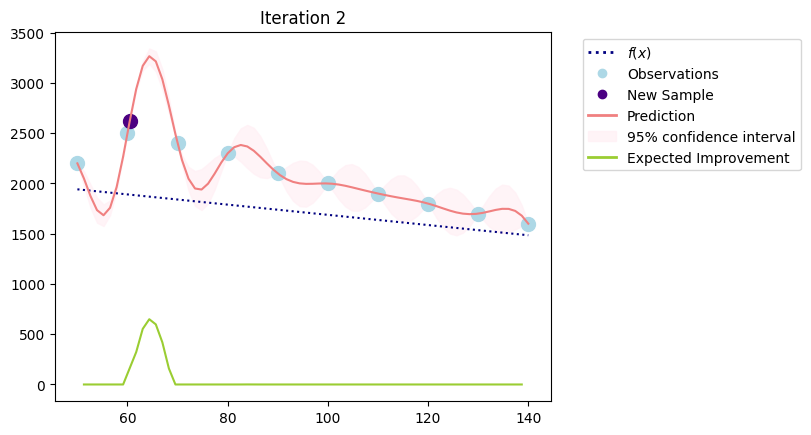

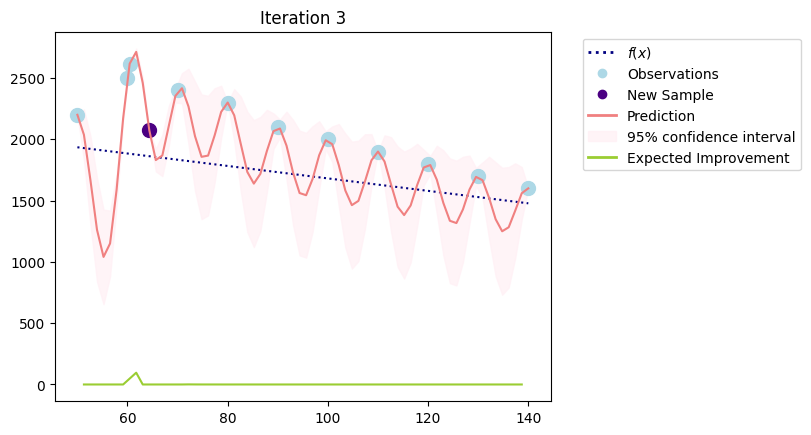

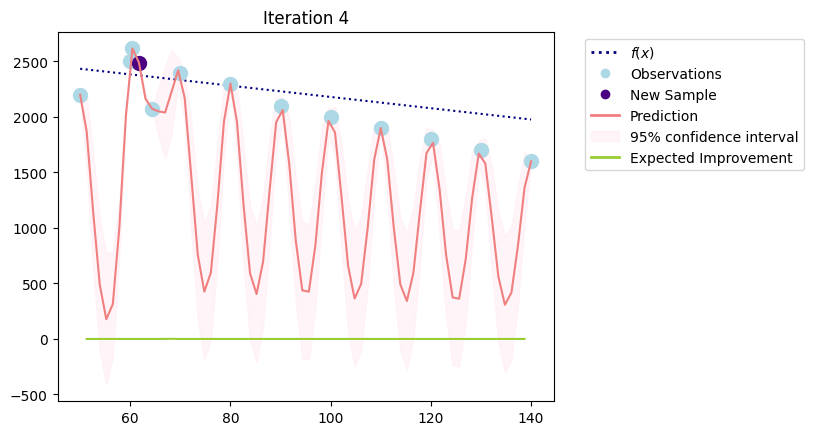

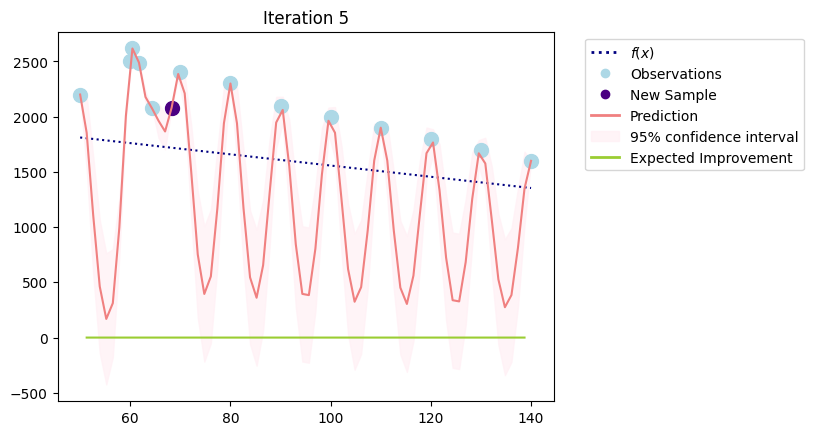

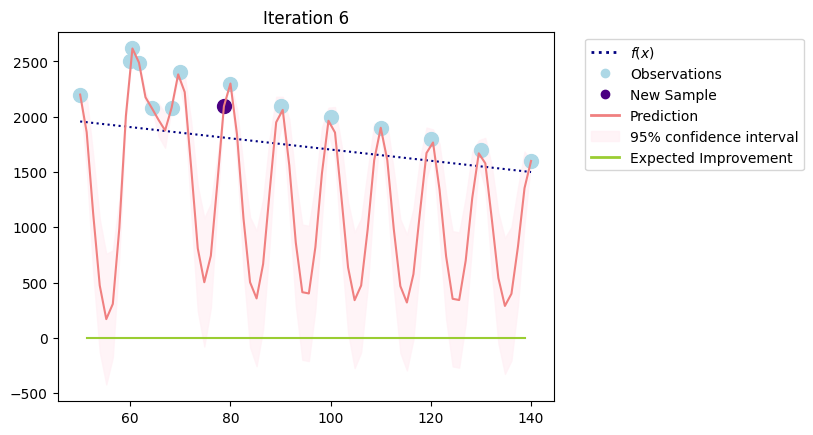

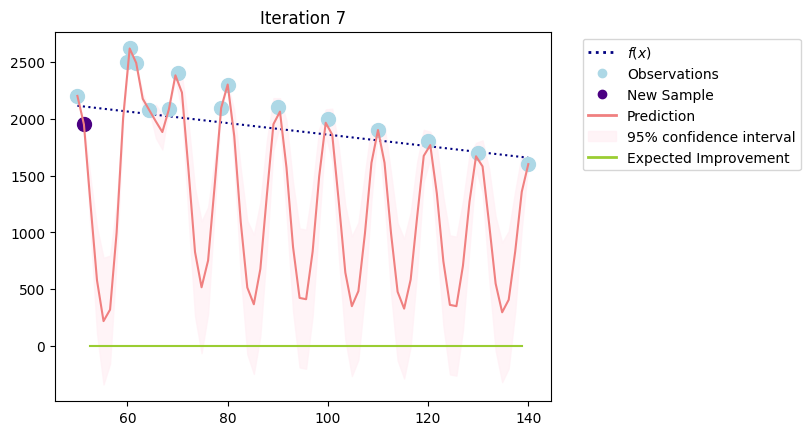

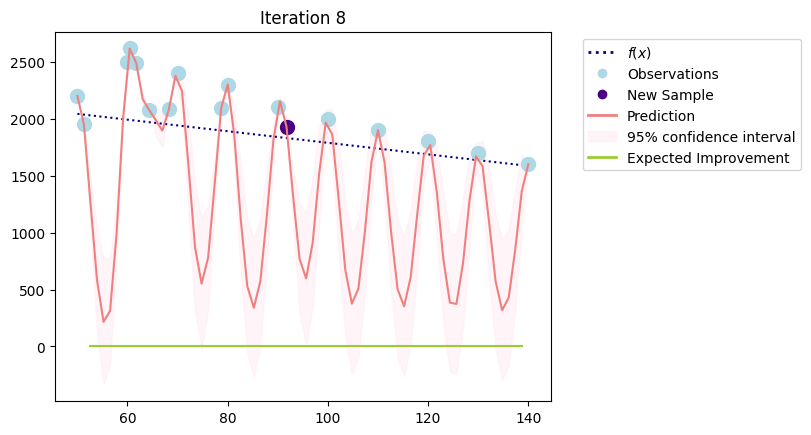

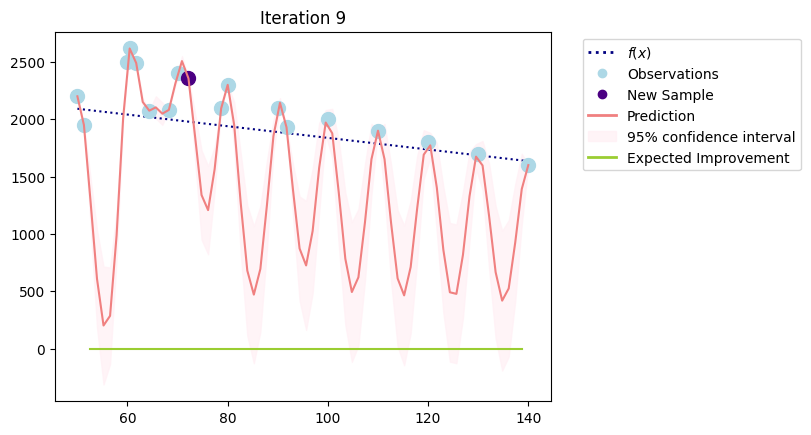

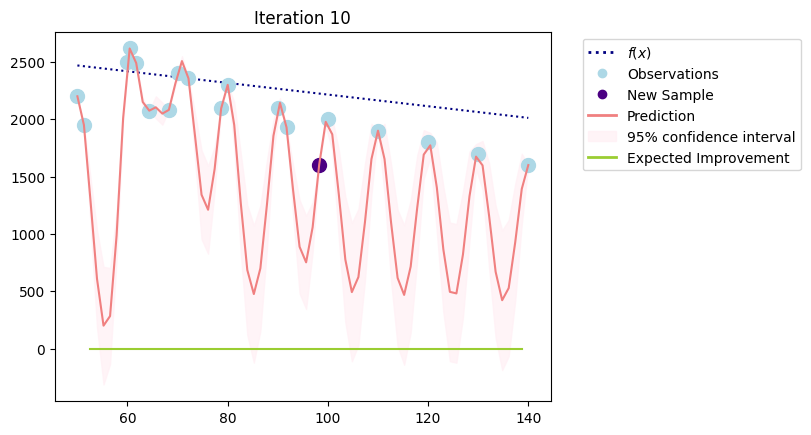

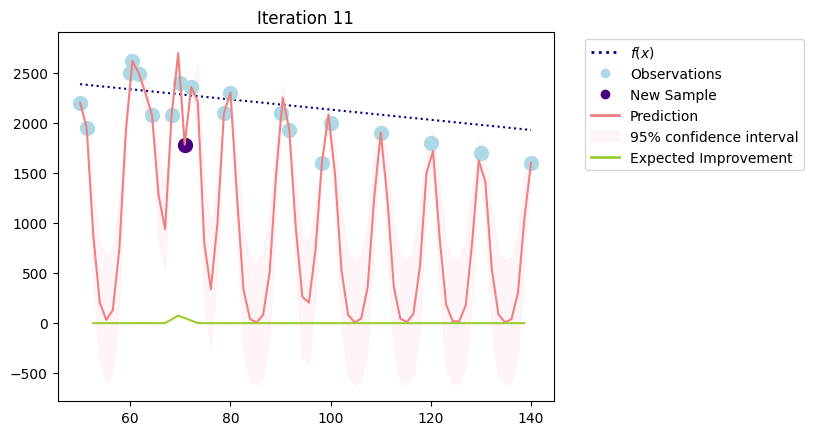

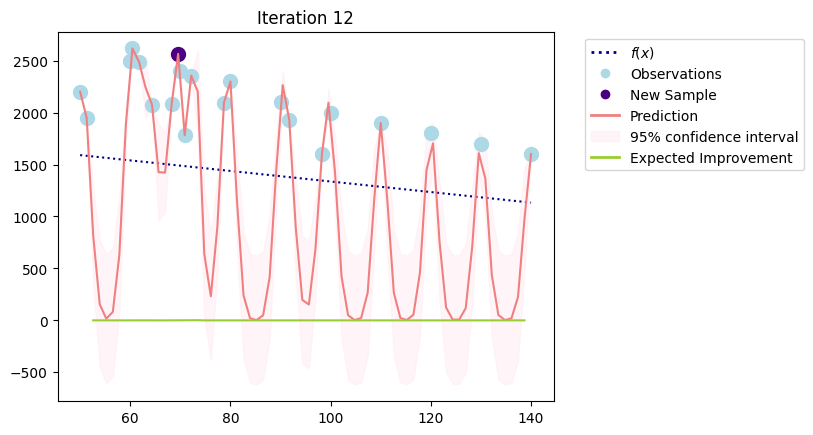

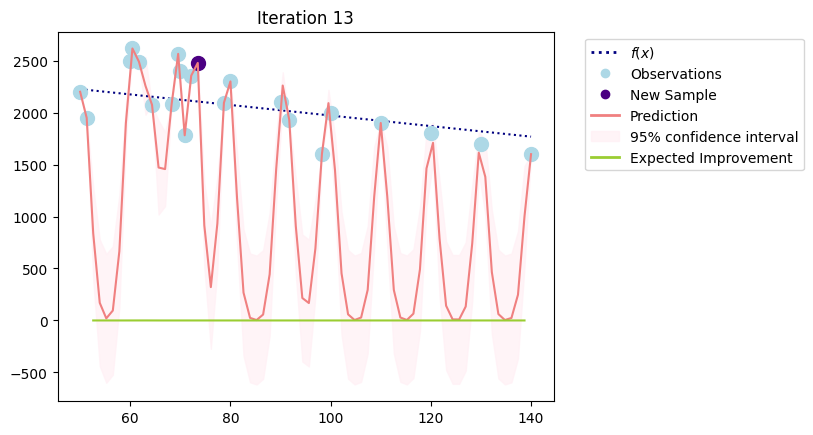

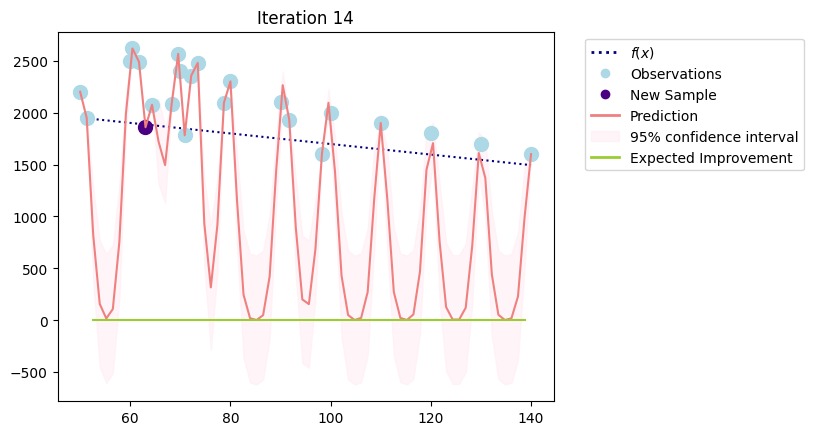

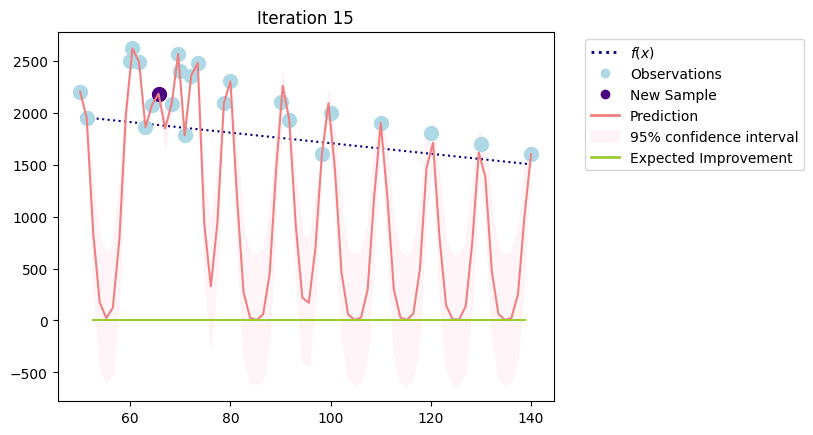

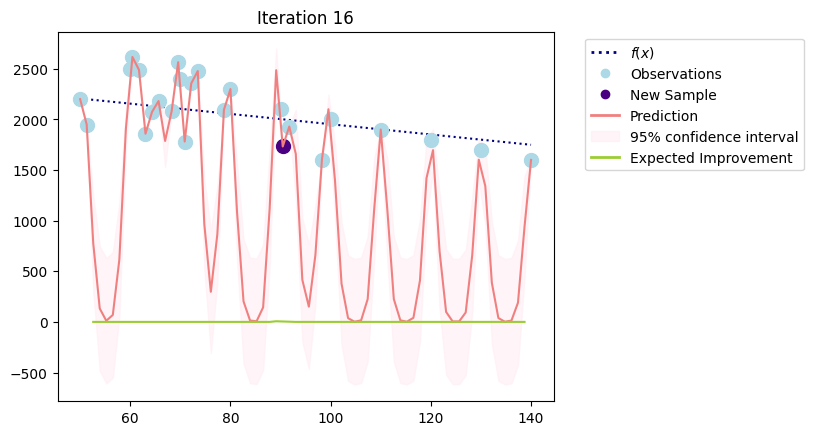

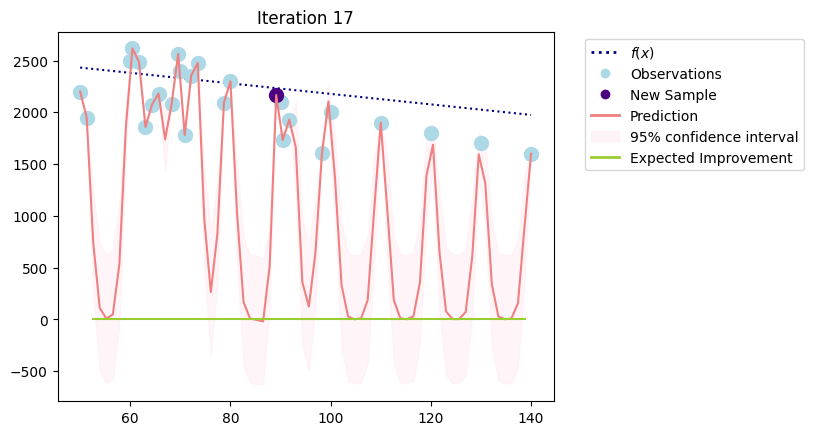

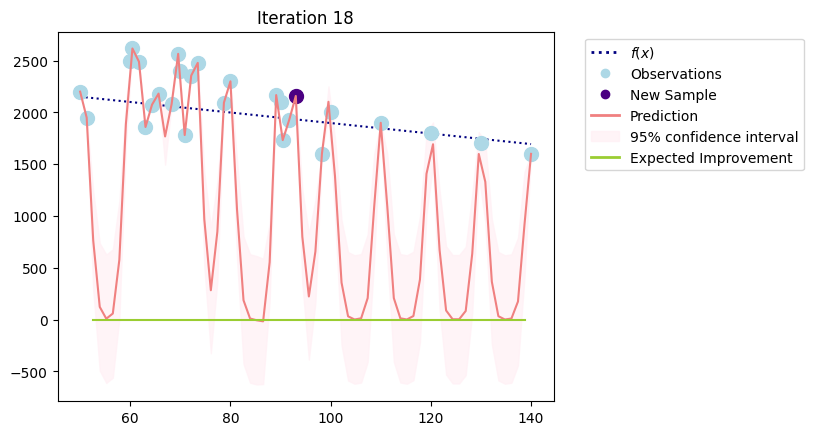

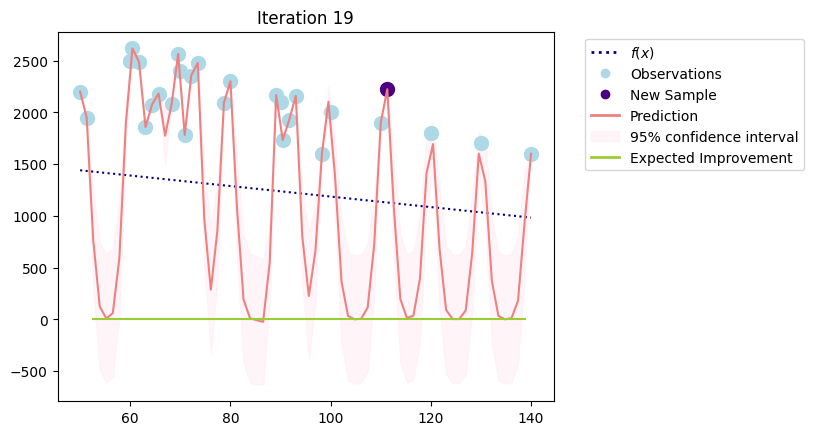

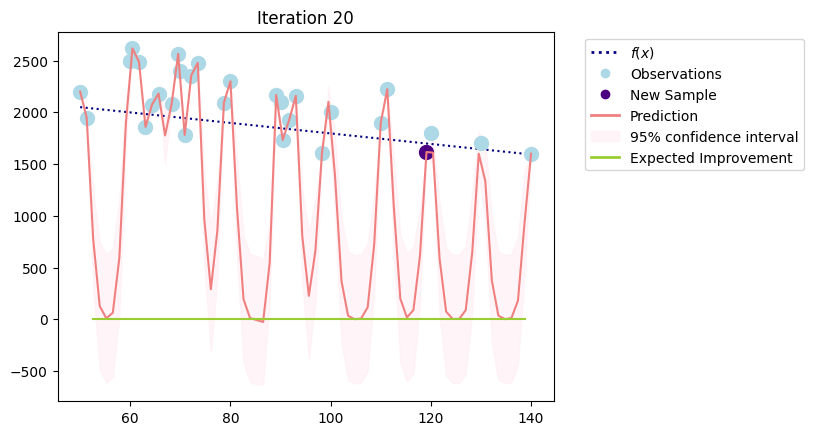

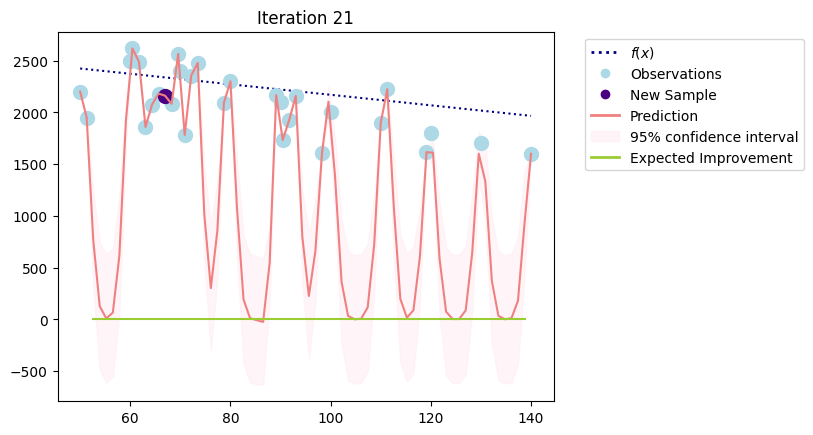

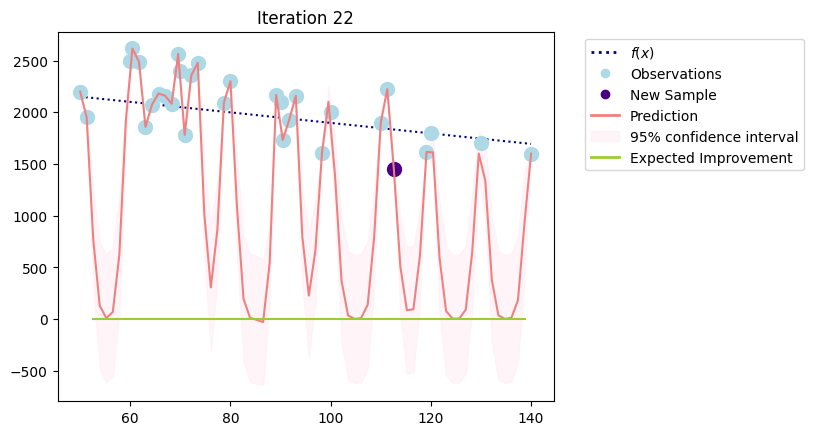

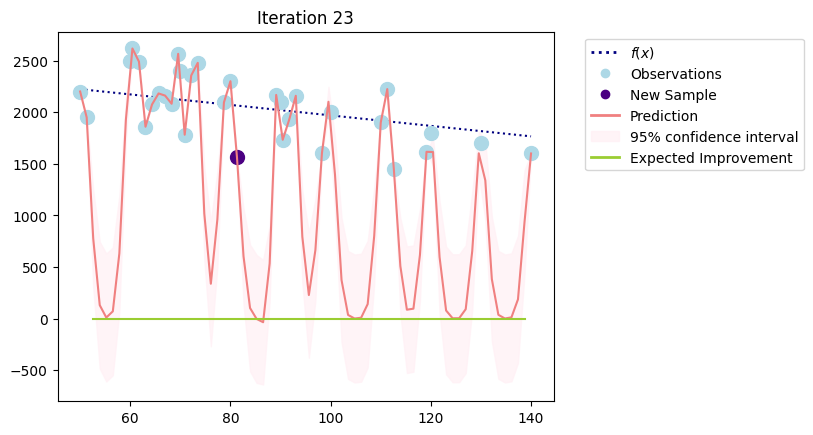

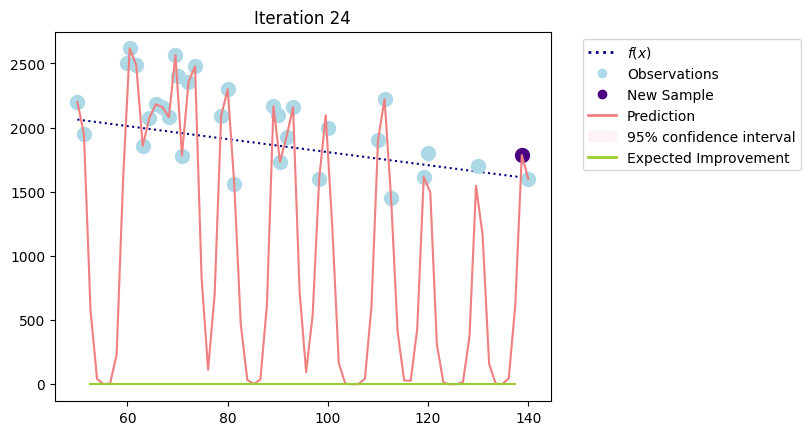

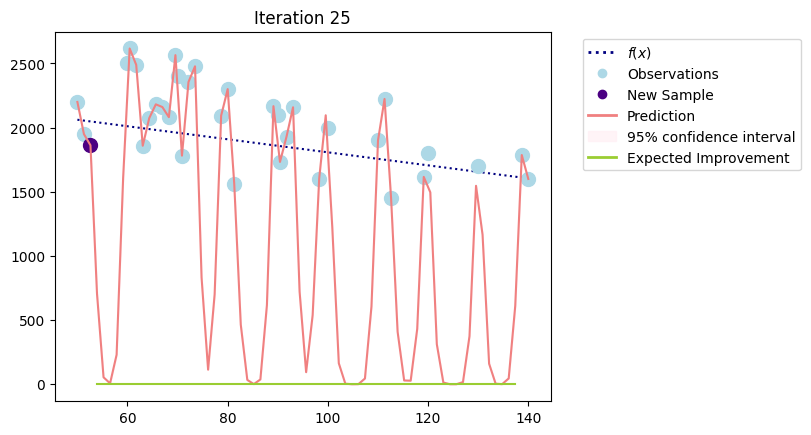

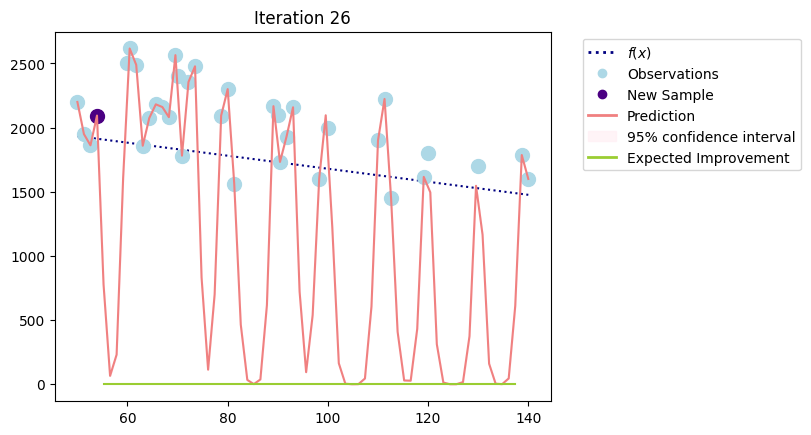

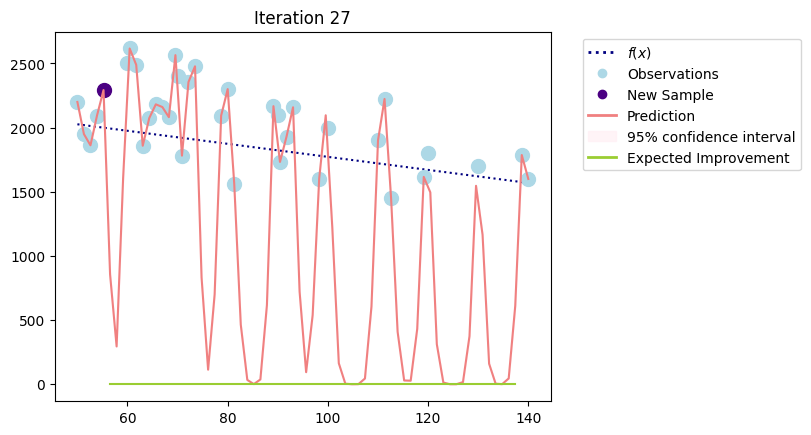

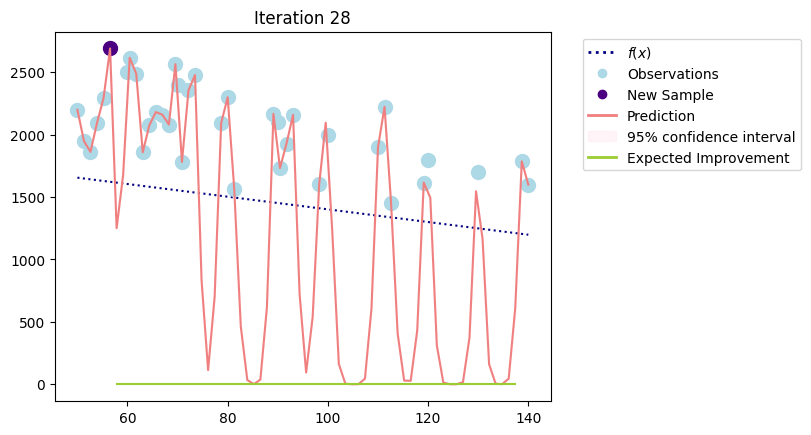

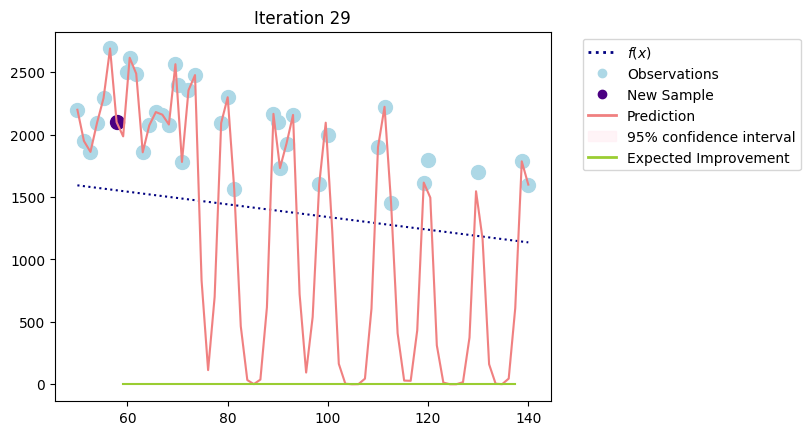

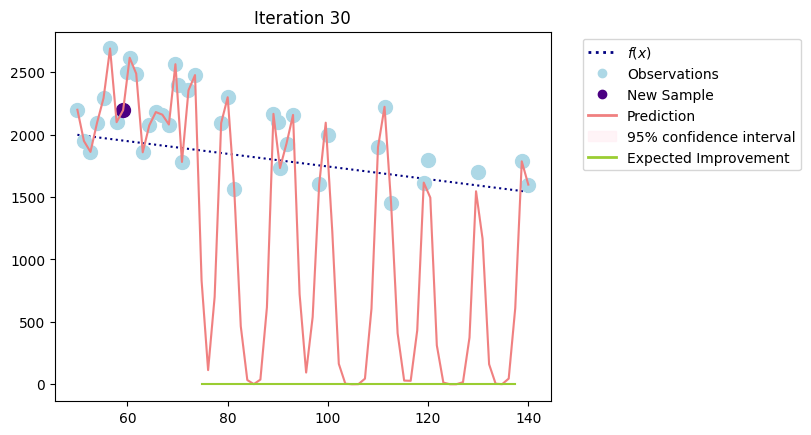

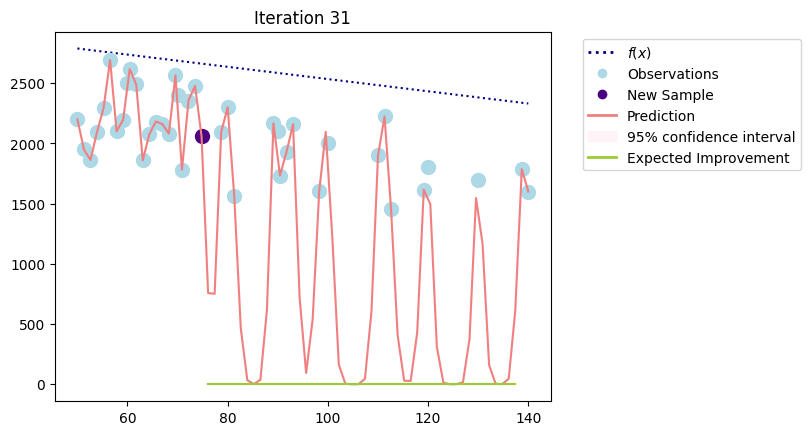

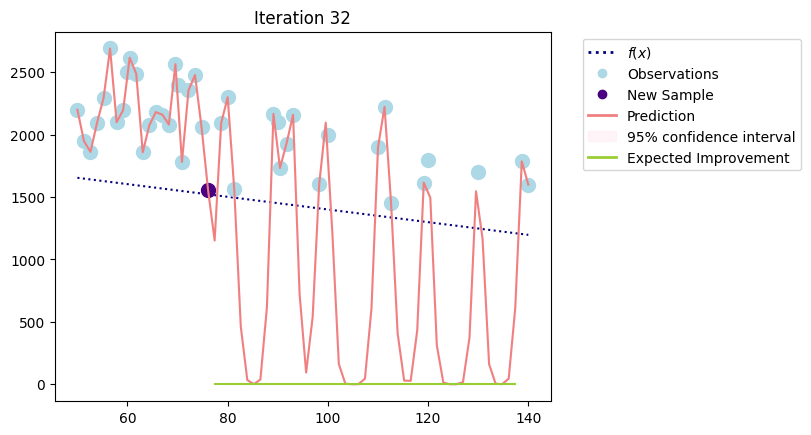

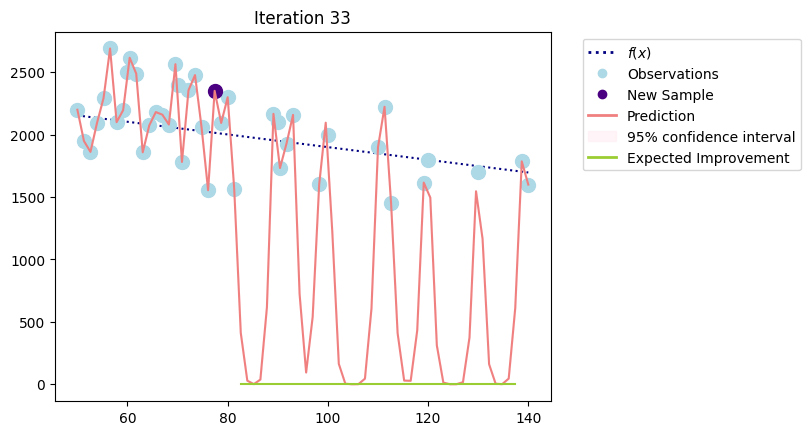

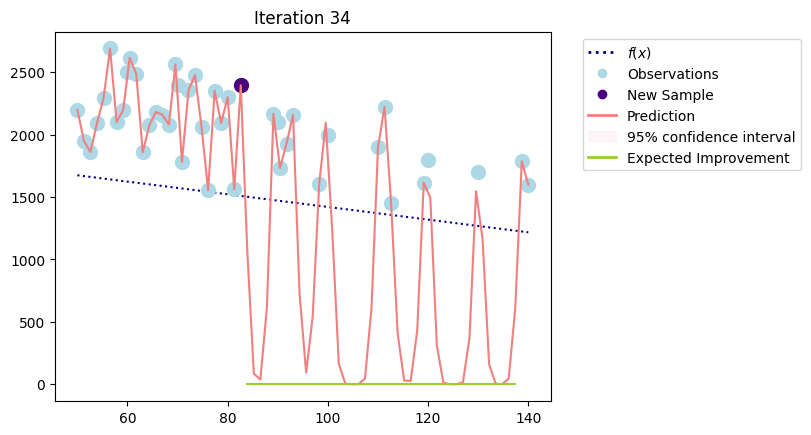

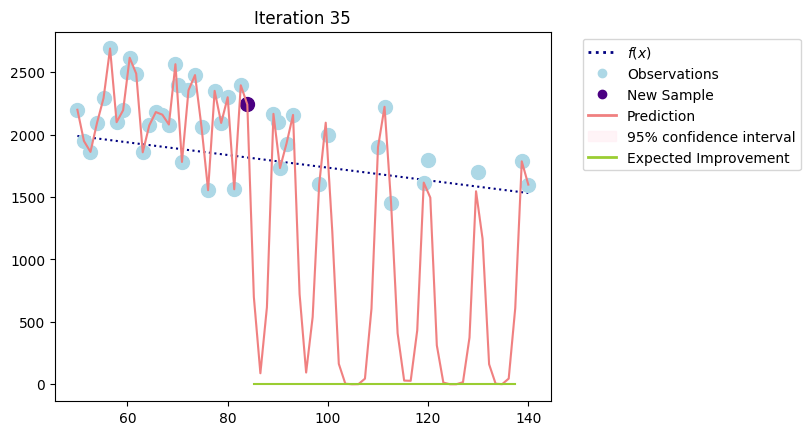

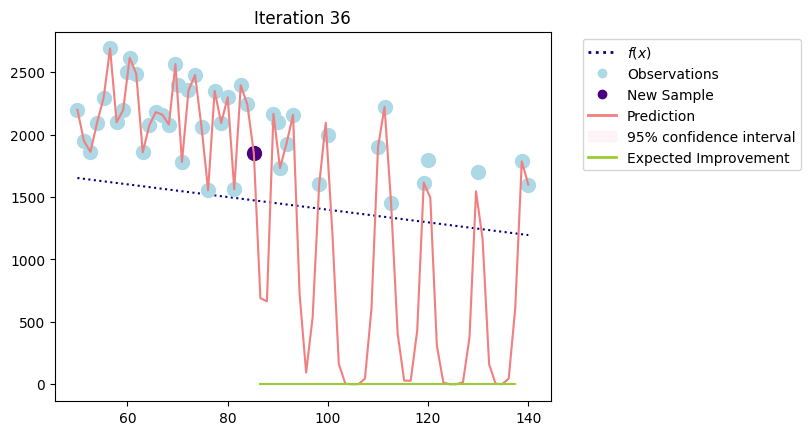

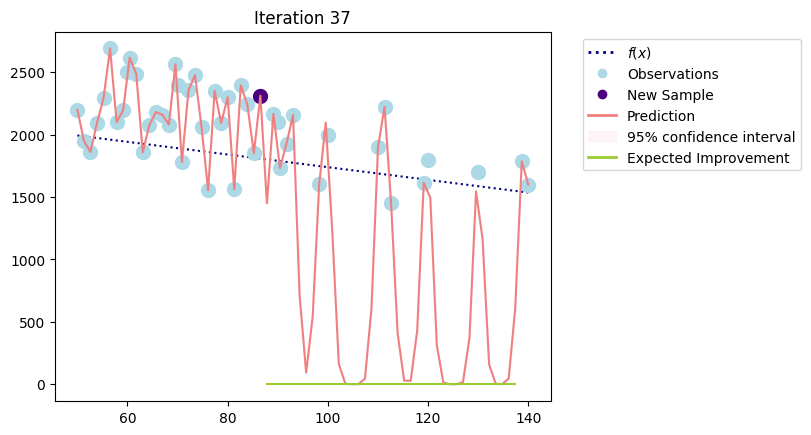

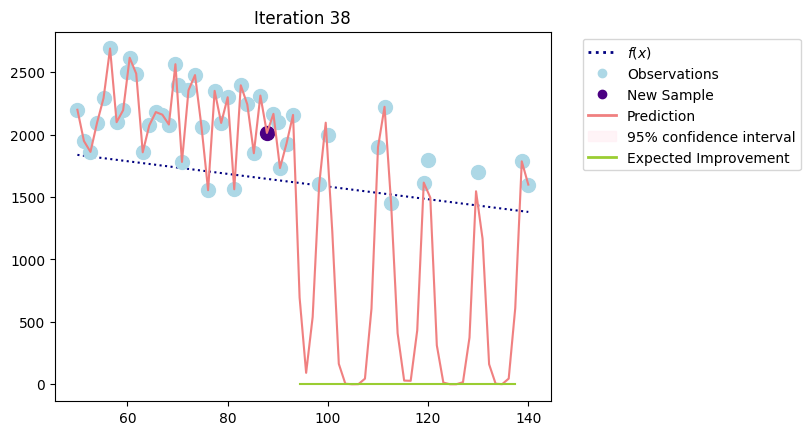

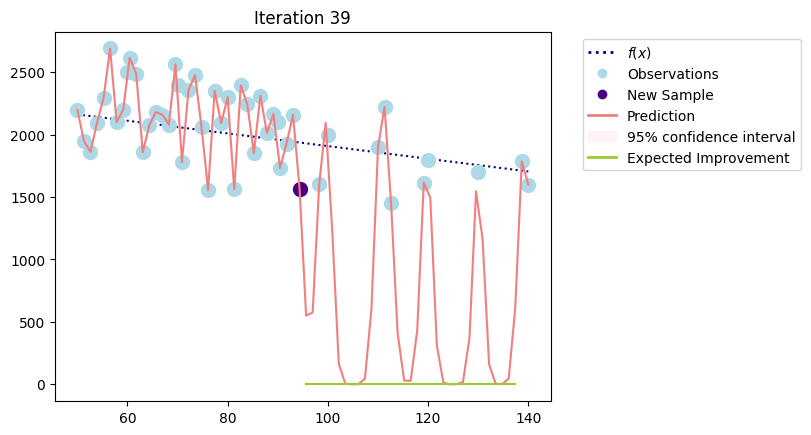

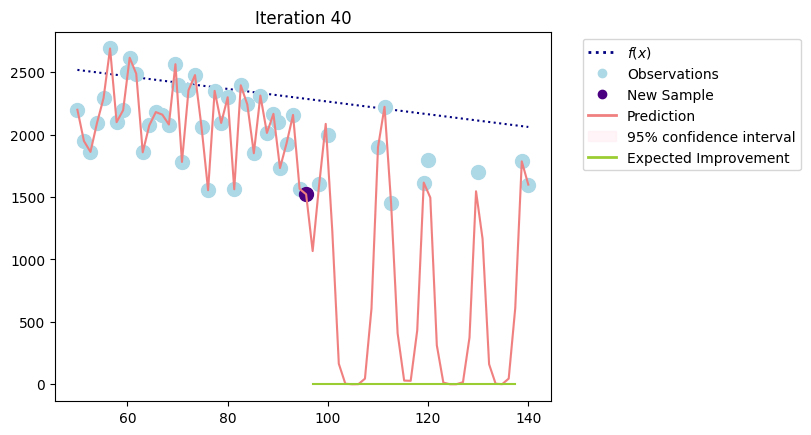

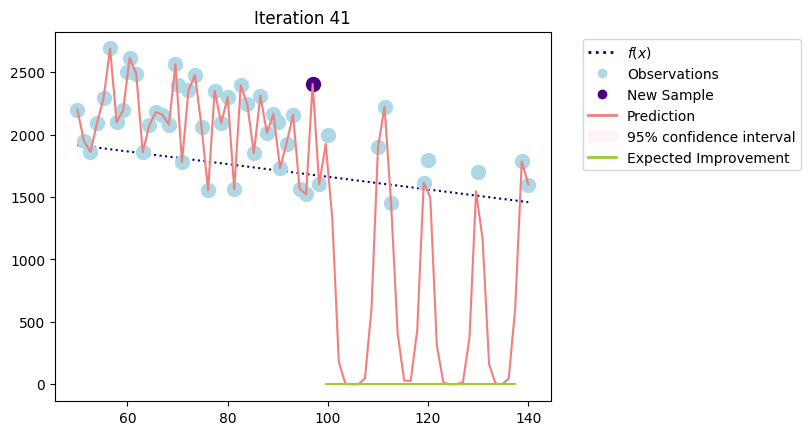

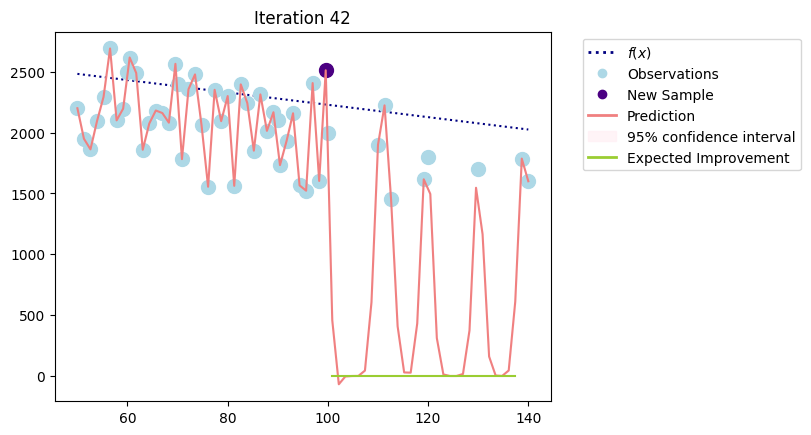

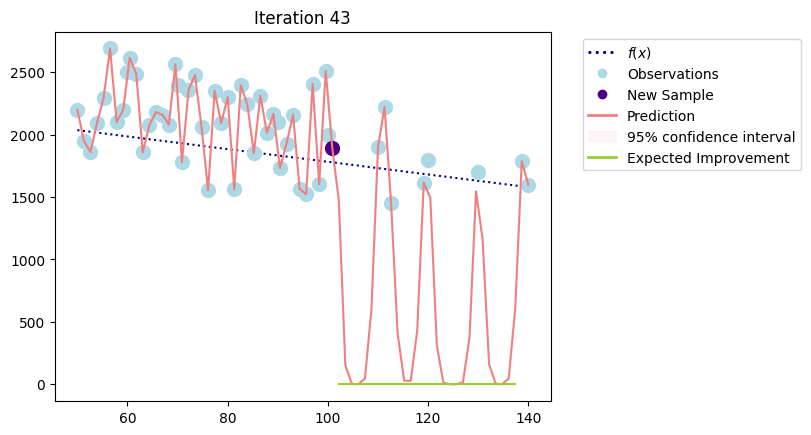

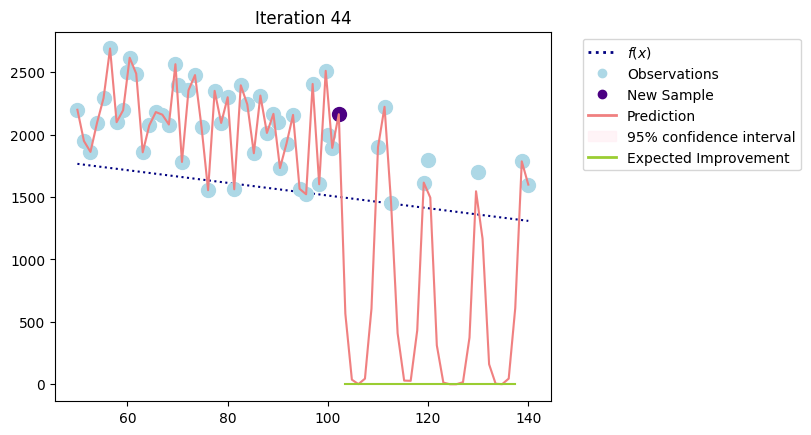

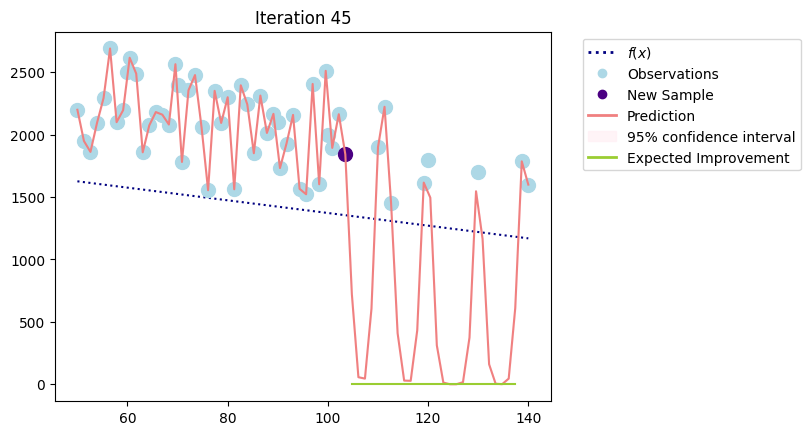

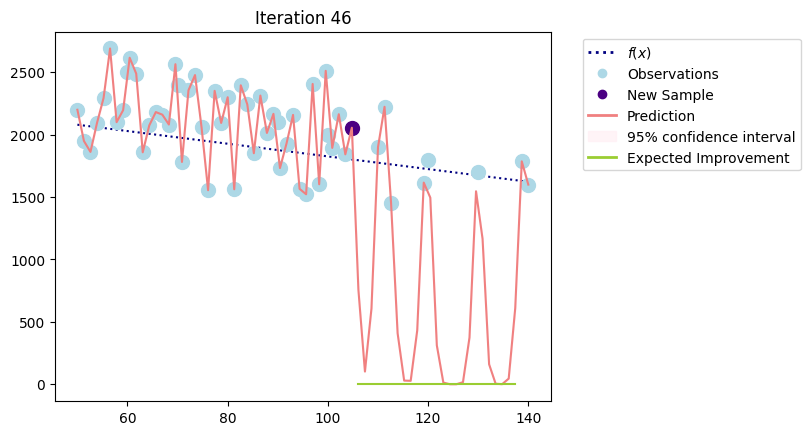

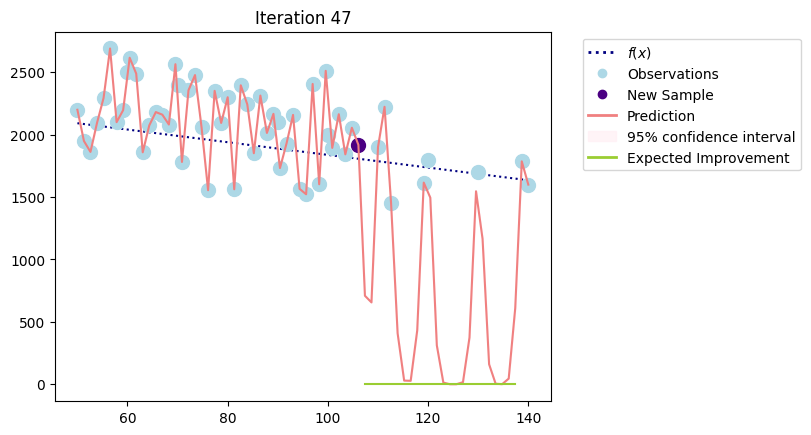

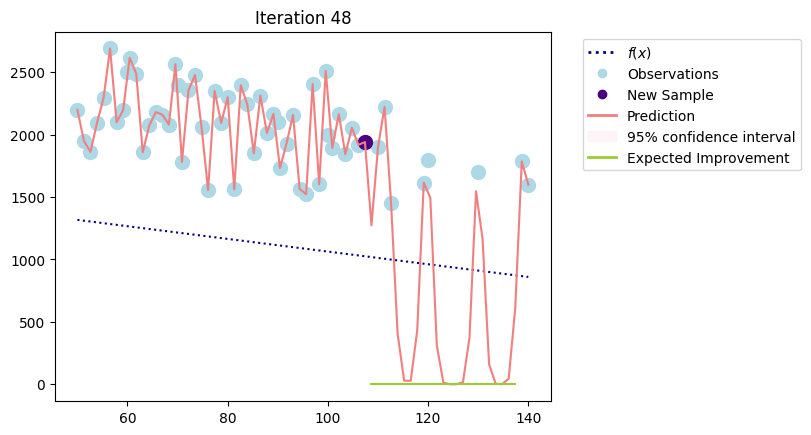

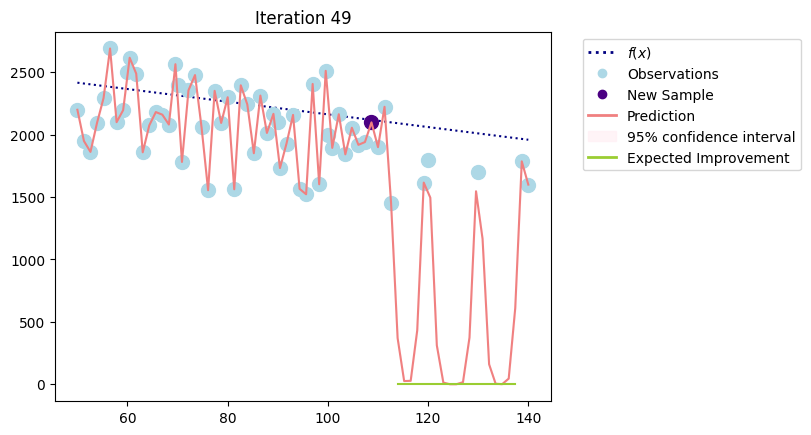

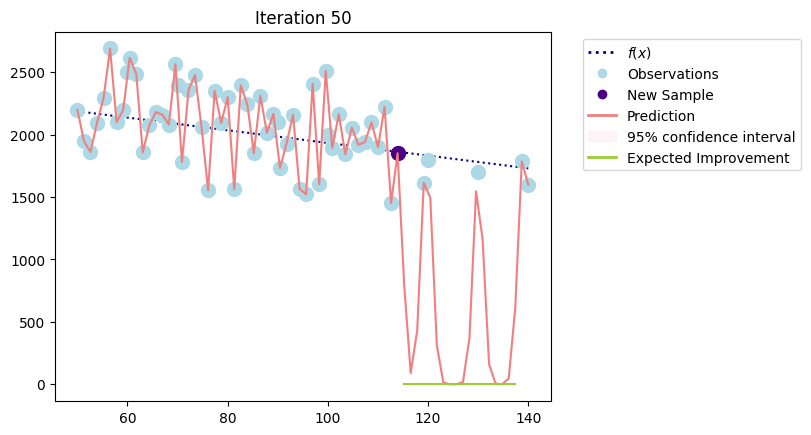

In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue July 26 15:54:41 2023

@author: Maryam Daryalal, MATH60623A
"""

epsilon = 1e-8

# Import the libraries
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import tikzplotlib

# b)

# Initial samples
X_sample = np.array(prior['Price (USD)']).reshape(-1, 1)
Y_sample = np.array(prior['Profit (USD)']).reshape(-1, 1)
#np.array(prior['Profit (USD)']).reshape(-1, 1)

# c)

# Gaussian process with Matérn kernel
kernel = ConstantKernel(1.0) * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel)

# Domain
x = np.linspace(50, 140, 70)[:, None]

# Iterations
n_iter = 50
for i in range(n_iter):

    # Update Gaussian process with existing samples
    gp.fit(X_sample, Y_sample)

    # Obtain posterior predictions from the GP on the remaining domain
    X_next_candidates = np.setdiff1d(x, X_sample.flatten(), assume_unique=True)[:, None]
    mu, std = gp.predict(X_next_candidates, return_std=True)

# d)

    # Compute Expected Improvement
    y_best = np.max(Y_sample)
    xi = 0.01
    Z = (mu.ravel() - y_best - xi) / (std.ravel() + epsilon)
    EI = (mu.ravel() - y_best - xi) * norm.cdf(Z) + std.ravel() * norm.pdf(Z)

# e)
    # Select next point to sample
    X_next = X_next_candidates[np.argmax(EI)]

    # Obtain next sample
    Y_next = simulate_sales(X_next)

# g)

    plt.figure(i)  # Create a new figure for this iteration
    plt.plot(x, simulate_sales(x), 'navy', linestyle=':', label=r'$f(x)$')
    # Here we add condition to change color of the last point based on the iteration
    if i > 0:
        plt.plot(X_sample[:-1], Y_sample[:-1], 'lightblue', marker='o', linestyle='', markersize=10, label='Observations')
        plt.plot(X_sample[-1], Y_sample[-1], 'indigo', marker='o', linestyle='', markersize=10, label='New Sample')
    else:
        plt.plot(X_sample, Y_sample, 'lightblue', marker='o', linestyle='', markersize=10, label='Observations')
    mu_all, std_all = gp.predict(x, return_std=True)  # Get predictions for entire domain
    plt.plot(x, mu_all, 'lightcoral', label='Prediction')

    mu_all = mu_all.ravel()
    std_all = std_all.ravel()
    plt.fill_between(x.ravel(), mu_all - 1.9600 * std_all, mu_all + 1.9600 * std_all, color='lavenderblush', alpha=0.7)
    plt.plot(X_next_candidates, EI, 'yellowgreen', label='Expected Improvement')
    plt.title(f'Iteration {i+1}')

    # Add sample to samples
    X_sample = np.vstack((X_sample, X_next))
    Y_sample = np.vstack((Y_sample, Y_next))


    # Create a legend
    if i > 0:
        legend_elements = [Line2D([0], [0], color='navy', linestyle=':', lw=2, label=r'$f(x)$'),
                           Line2D([0], [0], color='lightblue', marker='o', linestyle='', label='Observations'),
                           Line2D([0], [0], color='indigo', marker='o', linestyle='', label='New Sample'),
                           Line2D([0], [0], color='lightcoral', lw=2, label='Prediction'),
                           Patch(facecolor='lavenderblush', alpha=0.7, edgecolor='lavenderblush', label='95% confidence interval'),
                           Line2D([0], [0], color='yellowgreen', lw=2, label='Expected Improvement')]
    else:
        legend_elements = [Line2D([0], [0], color='navy', linestyle=':', lw=2, label=r'$f(x)$'),
                           Line2D([0], [0], color='lightblue', marker='o', linestyle='', label='Observations'),
                           Line2D([0], [0], color='lightcoral', lw=2, label='Prediction'),
                           Patch(facecolor='lavenderblush', alpha=0.7, edgecolor='lavenderblush', label='95% confidence interval'),
                           Line2D([0], [0], color='yellowgreen', lw=2, label='Expected Improvement')]

    # Place the legend to the right of the plot
    legend = plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save plot as tikz to a .tex file: Uncomment the following line you
    # tikzplotlib.save(f"figure_EI_{i+1}.tex")
plt.show()


(g) Plot the evolution of prices and profits over time. Discuss your findings. Did the algorithm converge to an optimal price? How did the estimated profit function evolve over time?

